# Extensive Form Games: Examples

In [1]:
import os
import sys
ngames_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'ngames'))
sys.path.append(ngames_path)

In [2]:
import matplotlib.pyplot as plt
from extensivegames import ExtensiveFormGame, plot_game

## Market game

From S. Fatima, S. Kraus, M. Wooldridge, Principles of Automated Negotiation, Cambridge University Press, 2014, see Figure 3.3.

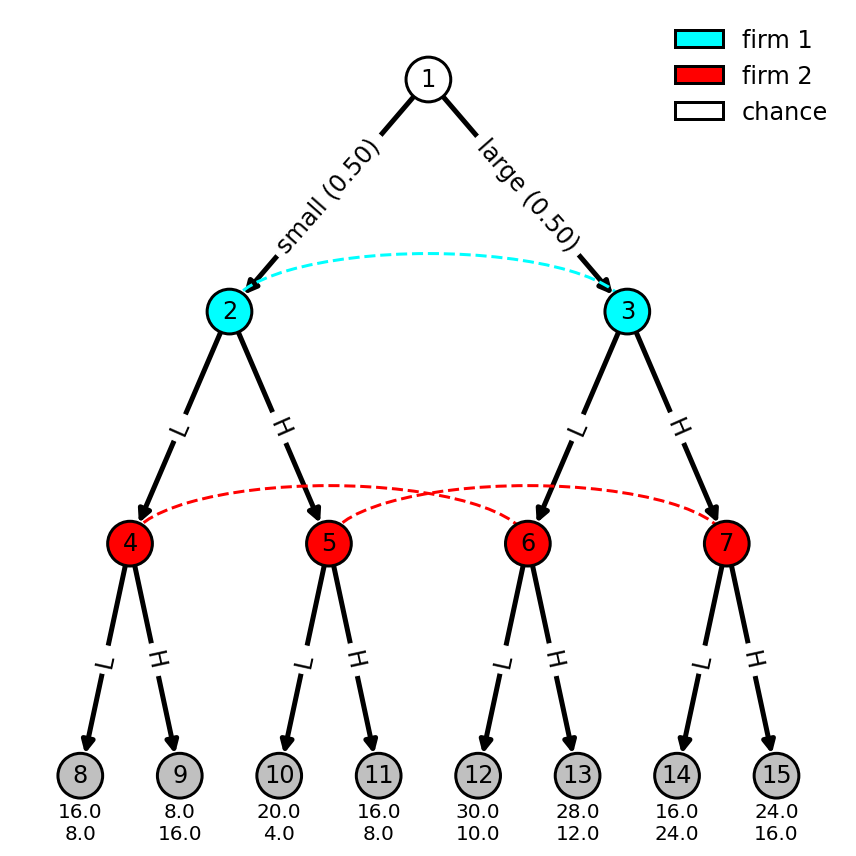

In [3]:
# build the game
m = ExtensiveFormGame(title='Market game')
m.add_players('firm 1', 'firm 2')
m.add_node(1, 'chance', is_root=True)
m.add_node(2, 'firm 1')
m.add_node(3, 'firm 1')
for i in range(4, 8):
    m.add_node(i, 'firm 2')
for i in range(8, 16):
    m.add_node(i)

m.add_edge(1, 2, label='small')
m.add_edge(1, 3, label='large')
m.add_edge(2, 4, label='L')
m.add_edge(2, 5, label='H')
m.add_edge(3, 6, label='L')
m.add_edge(3, 7, label='H')
m.add_edge(4, 8, label='L')
m.add_edge(4, 9, label='H')
m.add_edge(5, 10, label='L')
m.add_edge(5, 11, label='H')
m.add_edge(6, 12, label='L')
m.add_edge(6, 13, label='H')
m.add_edge(7, 14, label='L')
m.add_edge(7, 15, label='H')

m.set_information_partition('firm 2', {4, 6}, {5, 7})
m.set_information_partition('firm 1', {2, 3})

m.set_uniform_probability_distribution(1)

m.set_utility(8, {'firm 1':16, 'firm 2':8})
m.set_utility(9, {'firm 1':8, 'firm 2':16})
m.set_utility(10, {'firm 1':20, 'firm 2':4})
m.set_utility(11, {'firm 1':16, 'firm 2':8})
m.set_utility(12, {'firm 1':30, 'firm 2':10})
m.set_utility(13, {'firm 1':28, 'firm 2':12})
m.set_utility(14, {'firm 1':16, 'firm 2':24})
m.set_utility(15, {'firm 1':24, 'firm 2':16})

position_colors =  {'firm 1':'cyan', 'firm 2':'red'}

# default keywords for rendering the figure
my_fig_kwargs = dict(figsize=(12,12), frameon=False, tight_layout=True)
my_node_kwargs = dict(font_size=24, node_size=2000, edgecolors='k', linewidths=3)
my_edge_kwargs = dict(arrowsize=25, width=5)
my_edge_labels_kwargs = dict(font_size=24)
my_patch_kwargs = dict(linewidth=3)
my_legend_kwargs = dict(fontsize=24, loc='upper right', edgecolor='white')
my_utility_label_kwargs = dict(horizontalalignment='center', fontsize=20)
my_info_sets_kwargs = dict(linestyle='--', linewidth=3)

fig = plot_game(m, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.055,
                info_sets_kwargs=my_info_sets_kwargs)

## Prisoner's Dilemma

Classical one-shot Prioner's Dilemma, but in extensive form.

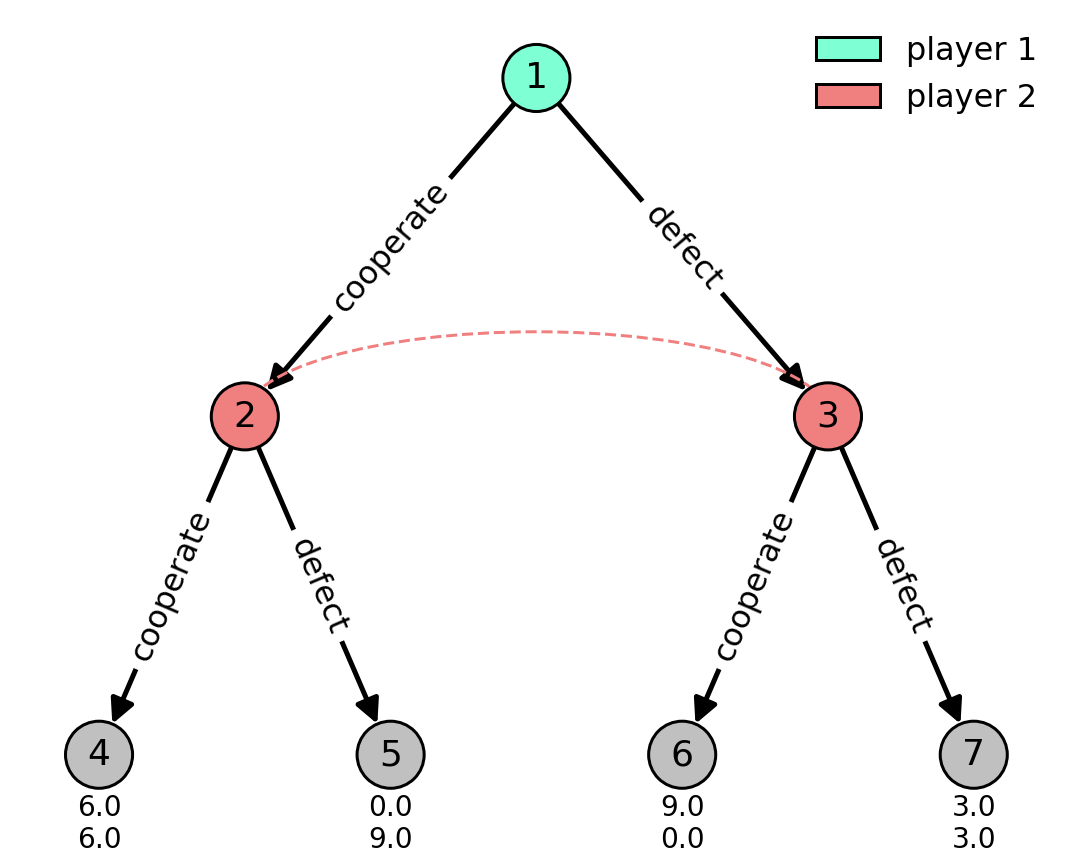

In [7]:
# build the game
pd = ExtensiveFormGame(name='Prisoners Dilemma')
pd.add_players('player 1', 'player 2')
pd.add_node(1, 'player 1', is_root=True)
pd.add_node(2, 'player 2')
pd.add_node(3, 'player 2')
for i in range(4, 8):
    pd.add_node(i)

pd.add_edge(1, 2, 'cooperate')
pd.add_edge(1, 3, 'defect')
pd.add_edge(2, 4, 'cooperate')
pd.add_edge(2, 5, 'defect')
pd.add_edge(3, 6, 'cooperate')
pd.add_edge(3, 7, 'defect')

pd.set_information_partition('player 2', {2, 3})

pd.set_utility(4, {'player 1':6, 'player 2':6})
pd.set_utility(5, {'player 1':0, 'player 2':9})
pd.set_utility(6, {'player 1':9, 'player 2':0})
pd.set_utility(7, {'player 1':3, 'player 2':3})

position_colors =  {'player 1':'aquamarine', 'player 2':'lightcoral'}
my_fig_kwargs = dict(figsize=(15, 12), frameon=False, tight_layout=True)
my_node_kwargs = dict(font_size=36, node_size=4500, edgecolors='k', linewidths=3)
my_edge_kwargs = dict(arrowsize=50, width=5)
my_edge_labels_kwargs = dict(font_size=32)
my_patch_kwargs = dict(linewidth=3)
my_legend_kwargs = dict(fontsize=32, loc='upper right', edgecolor='white')
my_utility_label_kwargs = dict(horizontalalignment='center', fontsize=28)
my_info_sets_kwargs = dict(linestyle='--', linewidth=3)
fig = plot_game(pd,
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.055,
                info_sets_kwargs=my_info_sets_kwargs)

fig.savefig('/home/nmontes/OneDrive/Documentos/PhD/action-situation-language/figures/pd_extensive.png', dpi=400, bbox_inches='tight')

## Example of information rules

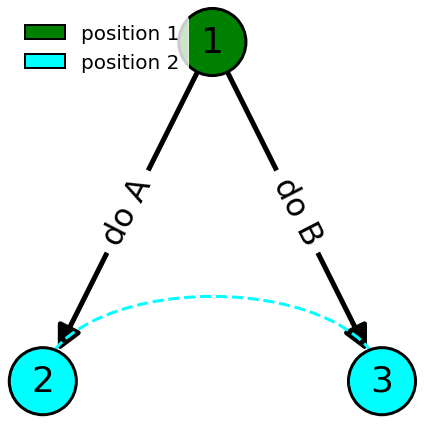

In [5]:
# build a very stupid game
example = ExtensiveFormGame()
example.add_players('position 1', 'position 2')
example.add_node(1, 'position 1', is_root=True)
example.add_node(2, 'position 2')
example.add_node(3, 'position 2')
example.add_edge(1, 2, label='do A')
example.add_edge(1, 3, label='do B')

example.set_information_partition('position 2', {2,3})

# pltot the game
position_colors = {'position 1':'green', 'position 2':'cyan'}
my_fig_kwargs['figsize'] = (6,6)
my_legend_kwargs['loc'] = 'upper left'
my_legend_kwargs['fontsize'] = 20
my_patch_kwargs['linewidth'] = 2
fig = plot_game(example,
                position_colors,
                utility_label_shift = 0., # because there are no terminal nodes
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                info_sets_kwargs=my_info_sets_kwargs)

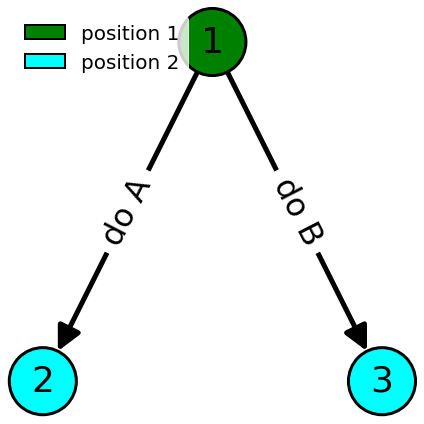

In [6]:
example.set_information_partition('position 2', {2},{3})
example.is_perfect_information = True
fig = plot_game(example,
                position_colors,
                utility_label_shift = 0., # because there are no terminal nodes
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                info_sets_kwargs=my_info_sets_kwargs)